In [1]:
# 한글 설치
# 실행 / 런타임=런타임 다시 시작 / 런타임-런타임 다시 시작 및 모두 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
# 데이터분석 시각화 라이브러리 불러오기
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/인터넷반응DB_2023년6월1주_2023년6월5주.CSV', encoding='cp949', thousands=',')

In [5]:
df

,주차,프로그램명,채널,요일,게시글,댓글,동영상조회,뉴스,동영상,게시글비율,댓글비율,동영상조회비율,뉴스비율,동영상비율,가구시청자수,2049시청자수,가구시청률,2049시청률
0,202322,* 라디오스타,MBC,수,631,1091,943540,368,50,1.4,0.6,1.8,2.1,0.8,600812,382645,2.8,1.8
1,202322,알토란,MBN,일,97,149,4893,37,17,0.2,0.1,0.0,0.2,0.3,269559,46352,1.3,0.2
2,202322,엄지의제왕,MBN,화,53,27,35657,8,24,0.1,0.0,0.1,0.0,0.4,181801,45989,0.9,0.2
3,202322,이제 만나러 갑니다,채널A,일,62,86,13845,9,25,0.1,0.0,0.0,0.1,0.4,184361,116582,0.9,0.6
4,202322,불후의 명곡,KBS2,토,917,5725,423248,319,142,2.0,2.9,0.8,1.8,2.4,1376207,357559,6.4,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,202326,근황TV 살아있네 살아있어,ENA/tvN STORY,목,77,68,10087,22,42,0.1,0.0,0.0,0.1,0.5,0,0,0.0,0.0
589,202326,몸쓸것들:S급 피지컬의 챌린지 100,K-STAR,금,306,121,28310,261,19,0.6,0.0,0.0,1.4,0.2,11022,2916,0.1,0.0
590,202326,기적의 형제,JTBC,수목,797,646,126065,414,28,1.5,0.2,0.2,2.2,0.4,482678,230095,2.3,1.1
591,202326,SHINee’s 15m,JTBC,수,160,6875,786187,75,49,0.3,2.5,1.4,0.4,0.6,114447,16960,0.5,0.1


In [13]:
df[df['가구시청률']==max(df['가구시청률'])]

,주차,프로그램명,채널,요일,게시글,댓글,동영상조회,뉴스,동영상,게시글비율,댓글비율,동영상조회비율,뉴스비율,동영상비율,가구시청자수,2049시청자수,가구시청률,2049시청률
63,202322,진짜가 나타났다!,KBS2,토일,512,1311,852397,236,99,1.1,0.7,1.6,1.3,1.6,3595404,1123192,16.8,5.4


In [22]:
df_n = df[['프로그램명', '게시글', '댓글', '동영상조회', '뉴스', '동영상',
      '가구시청률',
       '2049시청률']]

In [21]:
df.columns

Index(['주차', '프로그램명', '채널', '요일', '게시글', '댓글', '동영상조회', '뉴스', '동영상', '게시글비율',
       '댓글비율', '동영상조회비율', '뉴스비율', '동영상비율', '가구시청자수', '2049시청자수', '가구시청률',
       '2049시청률'],
      dtype='object')

In [23]:
df_c = df_n[df_n['프로그램명']=='진짜가 나타났다!']
df_c

,프로그램명,게시글,댓글,동영상조회,뉴스,동영상,가구시청률,2049시청률
63,진짜가 나타났다!,512,1311,852397,236,99,16.8,5.4
181,진짜가 나타났다!,379,723,780171,134,91,16.3,5.8
298,진짜가 나타났다!,436,425,702450,248,77,15.6,4.9
414,진짜가 나타났다!,509,1102,773715,242,122,14.8,5.2
532,진짜가 나타났다!,540,1280,1256155,235,131,14.7,4.8


In [25]:
df_c.corr(numeric_only=True)

,게시글,댓글,동영상조회,뉴스,동영상,가구시청률,2049시청률
게시글,1.000000,0.810997,0.622478,0.749860,0.762641,-0.446983,-0.606110
댓글,0.810997,1.000000,0.633967,0.258981,0.791254,-0.105080,-0.065330
동영상조회,0.622478,0.633967,1.000000,0.152653,0.737680,-0.438159,-0.455728
뉴스,0.749860,0.258981,0.152653,1.000000,0.254837,-0.409555,-0.814717
동영상,0.762641,0.791254,0.737680,0.254837,1.000000,-0.659090,-0.321379
가구시청률,-0.446983,-0.105080,-0.438159,-0.409555,-0.659090,1.000000,0.687325
2049시청률,-0.606110,-0.065330,-0.455728,-0.814717,-0.321379,0.687325,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: title={'center': '시청률이 가장 높은 프로그램의 데이터 속성 관계'}>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


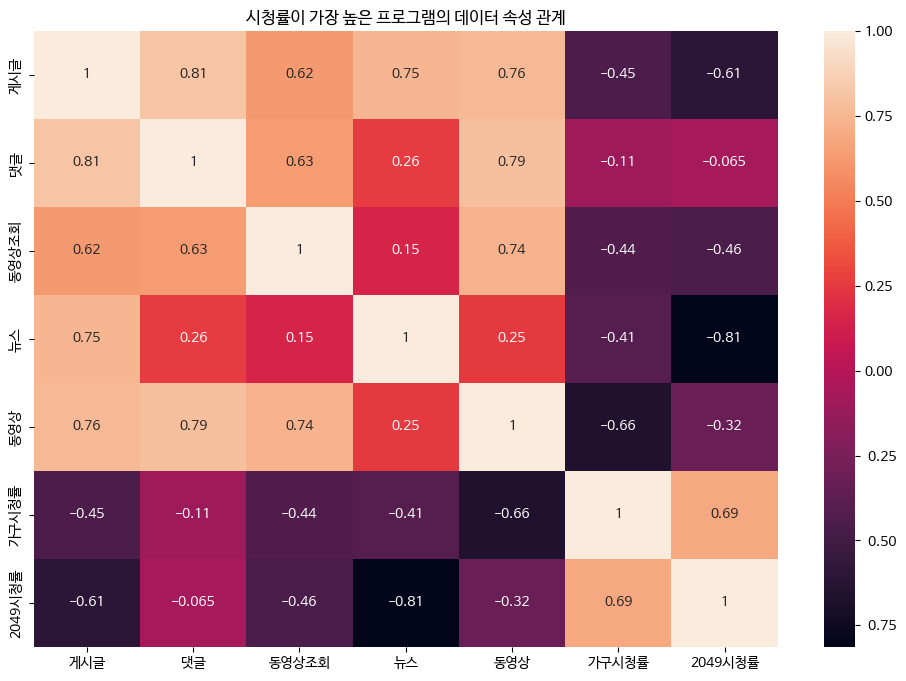

In [24]:
# 특정 프로그램에 대한 시청률 속성과 다른 속성과의 관계 시각화
plt.figure(figsize=(12, 8)) # 크기 조정
plt.title('시청률이 가장 높은 프로그램의 데이터 속성 관계') # 제목
sns.heatmap(df_c.corr(numeric_only=True), annot=True) # 상관계수 시각화